In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

In [ ]:
data.shape

(5572, 5)

In [ ]:
data.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3437,ham,Its good to hear from you,NaN,NaN,NaN
685,ham,Have you finished work yet? :),NaN,NaN,NaN
2936,ham,Lol yep did that yesterday. Already got my fir...,NaN,NaN,NaN
2204,ham,Raji..pls do me a favour. Pls convey my Birthd...,NaN,NaN,NaN
32,ham,K tell me anything about you.,NaN,NaN,NaN
5034,ham,How many times i told in the stage all use to ...,NaN,NaN,NaN


## 1. Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# very less non-null values in last 3 columns, so they are of no use. Dropping them
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# renaming the cols
data.rename(columns={'v1':'target','v2':'text'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# We need 1 in place of spam, and 0 in place of ham. So using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit_transform(data['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
data['target'] = encoder.fit_transform(data['target'])
data.sample(10)

,target,text
5438,0,"\What are youdoing later? Sar xxx\"""""
381,0,"Yeah sure, give me a couple minutes to track d..."
2670,0,Yes. They replied my mail. I'm going to the ma...
5359,0,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...
3360,0,You only hate me. You can call any but you did...
5086,0,Omg if its not one thing its another. My cat h...
5564,0,Why don't you wait 'til at least wednesday to ...
3619,0,I meant as an apology from me for texting you ...
1201,0,I know she called me
3658,0,Wait.i will come out.. &lt;#&gt; min:)


In [ ]:
# check for missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# No missing values, Now check for duplicate values
data.duplicated().sum()

403

In [ ]:
# There are 403 duplicates, so we need to remove them
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Cleaned data having no duplicates and missing values
data.shape

(5169, 2)

## 2.EDA (Exploratory Data Analysis) for better understanding about *data*

In [ ]:
# Count what % of data is spam or ham
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

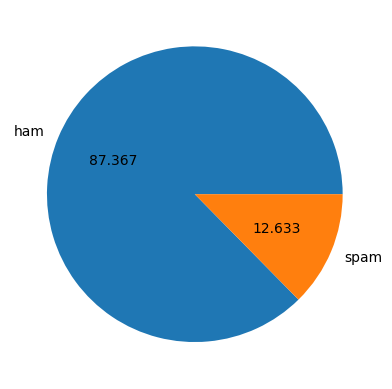

In [ ]:
# As we can see data is very imbalanced, spam texts are only 12%, so we need to keep this in mind
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [ ]:
# Now we can count number of alphabets, words or sentence in each sms. For this we will be needing nltk library
!pip install nltk

In [ ]:
import nltk

In [ ]:
# just for downloading essential dependencies for nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# we will be creating 3 columns, 1 for number of characters, 2nd for no of words and 3rd for number of sentences in each sms.
data['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [ ]:
# 1st column num_chars
data['num_chars'] = data['text'].apply(len)

In [ ]:
data.sample(10)

,target,text,num_chars
4948,0,I am in bus on the way to calicut,33
572,0,Can you open the door?,22
1181,0,You flippin your shit yet?,26
921,0,On ma way to school. Can you pls send me ashle...,56
1624,1,500 free text msgs. Just text ok to 80488 and ...,71
4566,0,But you were together so you should be thinkin...,56
4345,0,You still around? I could use a half-8th,40
1598,0,Daddy will take good care of you :),35
2685,1,URGENT! We are trying to contact U. Todays dra...,158
1124,0,Aiyar sorry lor forgot 2 tell u...,34


In [ ]:
# 2nd column num_words
data['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [ ]:
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
data.sample(10)

,target,text,num_chars,num_words
319,0,"Coffee cake, i guess...",23,6
1354,0,Baaaaabe! I misss youuuuu ! Where are you ? I ...,84,21
1413,1,Dear U've been invited to XCHAT. This is our f...,143,25
4950,0,hi baby im sat on the bloody bus at the mo and...,136,32
2587,0,"Aight, see you in a bit",23,7
3711,0,Wat u doing there?,18,5
3395,1,URGENT! Your Mobile number has been awarded wi...,127,24
3786,0,WHORE YOU ARE UNBELIEVABLE.,27,5
3650,0,Want to send me a virtual hug?... I need one,44,12
4395,0,Dear :-/ why you mood off. I cant drive so i b...,61,16


In [ ]:
# 3rd column num_sent
data['num_sent'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.sample(10)

,target,text,num_chars,num_words,num_sent
1035,0,"Hello baby, did you get back to your mom's ? A...",157,37,5
5032,0,* Was really good to see you the other day dud...,69,16,1
2522,0,Dunno lei... I might b eatin wif my frens... I...,82,22,3
2816,1,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,160,30,1
1820,0,I'll probably be by tomorrow (or even later to...,76,17,1
423,1,URGENT! Your Mobile number has been awarded wi...,137,26,5
394,0,Pick you up bout 7.30ish? What time are and t...,56,13,2
3934,0,You need to get up. Now.,24,8,2
2766,1,Married local women looking for discreet actio...,155,29,3
4430,0,2mro i am not coming to gym machan. Goodnight.,46,11,2


In [ ]:
# Now let's analyze meam, median etc on all the 3 columns
data[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# let's analyze ham and spam separately
# for ham "data['target'] == 0"
data[data['target'] == 0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# for spam messages
data[data['target'] == 1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# After seeing above analysis, we can get idea how spam and ham messages are different. On an average, number of chars, words or sentences are greater
# in spam messages than ham messages

In [ ]:
# we can plot the above analysis using seaborn
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

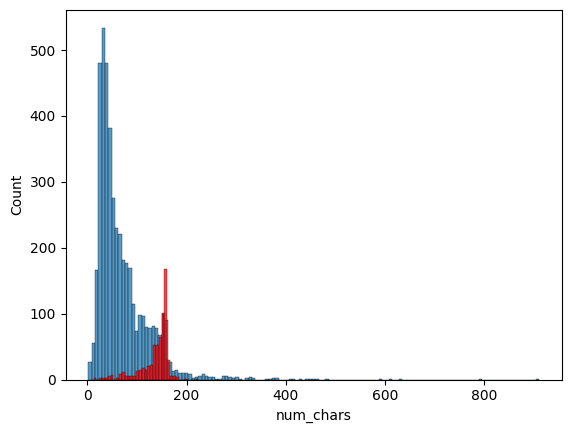

In [ ]:
sns.histplot(data[data['target'] == 0]['num_chars'])
sns.histplot(data[data['target'] == 1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

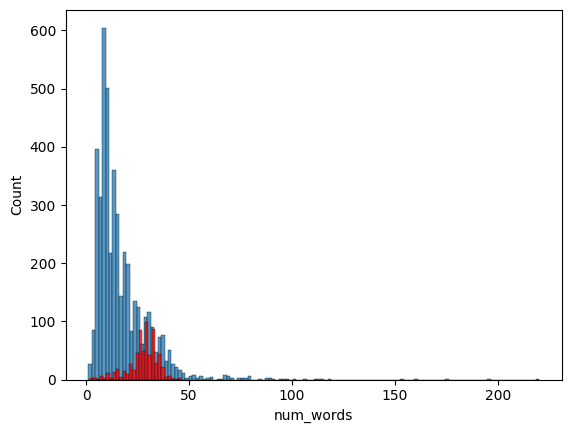

In [ ]:
sns.histplot(data[data['target'] == 0]['num_words'])
sns.histplot(data[data['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

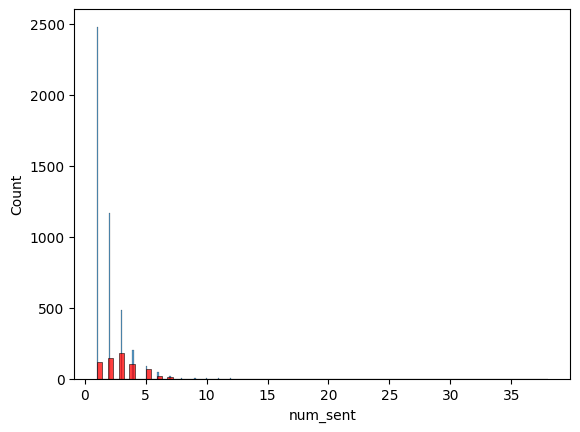

In [ ]:
sns.histplot(data[data['target'] == 0]['num_sent'])
sns.histplot(data[data['target'] == 1]['num_sent'],color='red')

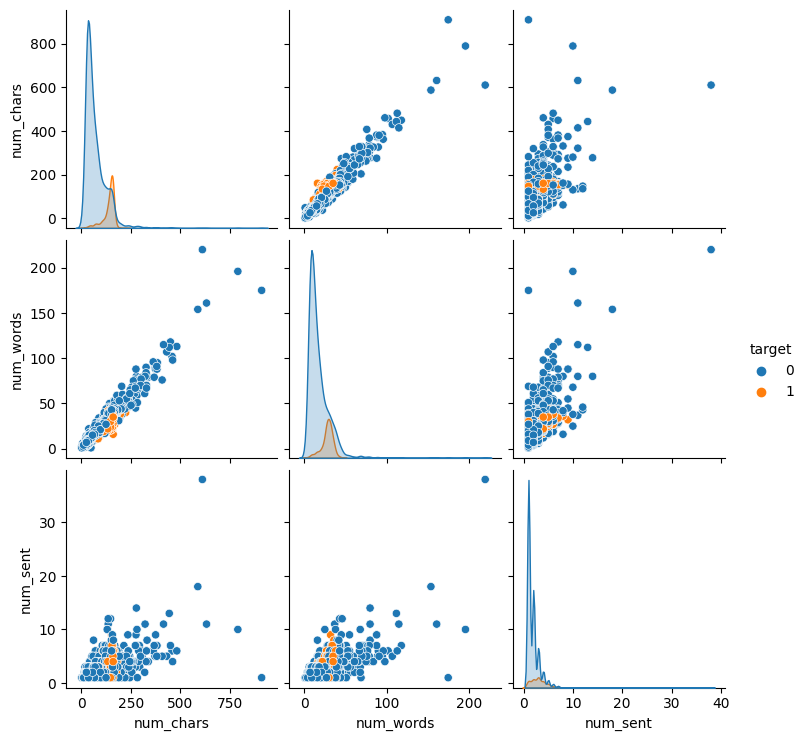

In [ ]:
# correlation between 3 colums
sns.pairplot(data, hue='target')

In [ ]:
# correlation coefficient
data.corr()

<ipython-input-67-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_chars,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


<ipython-input-68-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

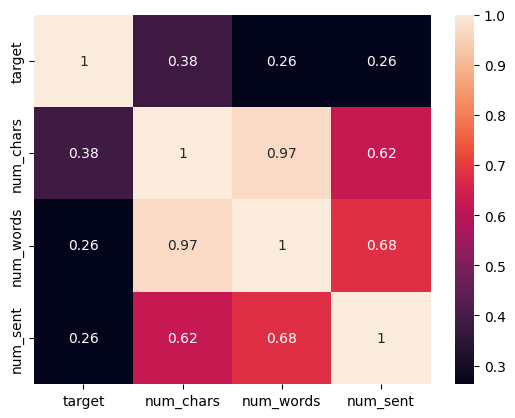

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# nums_char have 0.38 correlation with target, so we will be using this column. We can't take all three columns because there are strong correlation between them.